In [1]:

import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, recall_score,accuracy_score
from keras.models import Sequential 
from keras import Input 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, SimpleRNN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/AIProject/heart.csv')

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data['Sex']=data['Sex'].replace('M',0)
data['Sex']=data['Sex'].replace('F',1)

In [ ]:
data['ChestPainType']=data['ChestPainType'].replace('ATA',1)
data['ChestPainType']=data['ChestPainType'].replace('TA',2)
data['ChestPainType']=data['ChestPainType'].replace('ASY',3)
data['ChestPainType']=data['ChestPainType'].replace('NAP',4)
data['ChestPainType'].unique()

array([1, 4, 3, 2])

In [ ]:
data['RestingECG']=data['RestingECG'].replace('Normal',1)
data['RestingECG']=data['RestingECG'].replace('ST',2)
data['RestingECG']=data['RestingECG'].replace('LVH',3)
data['RestingECG'].unique()

array([1, 2, 3])

In [ ]:
data['ExerciseAngina']=data['ExerciseAngina'].replace('N',0)
data['ExerciseAngina']=data['ExerciseAngina'].replace('Y',1)
data['ExerciseAngina'].unique()

array([0, 1])

In [ ]:
data['ST_Slope']=data['ST_Slope'].replace('Up',1)
data['ST_Slope']=data['ST_Slope'].replace('Flat',2)
data['ST_Slope']=data['ST_Slope'].replace('Down',3)
data['ST_Slope'].unique()

array([1, 2, 3])

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,1,172,0,0.0,1,0
1,49,1,4,160,180,0,1,156,0,1.0,2,1
2,37,0,1,130,283,0,2,98,0,0.0,1,0
3,48,1,3,138,214,0,1,108,1,1.5,2,1
4,54,0,4,150,195,0,1,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,1,132,0,1.2,2,1
914,68,0,3,144,193,1,1,141,0,3.4,2,1
915,57,0,3,130,131,0,1,115,1,1.2,2,1
916,57,1,1,130,236,0,3,174,0,0.0,2,1


In [ ]:
y=data['HeartDisease']
X=data.iloc[:,0:11]
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,0,1,140,289,0,1,172,0,0.0,1
1,49,1,4,160,180,0,1,156,0,1.0,2
2,37,0,1,130,283,0,2,98,0,0.0,1
3,48,1,3,138,214,0,1,108,1,1.5,2
4,54,0,4,150,195,0,1,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,2,110,264,0,1,132,0,1.2,2
914,68,0,3,144,193,1,1,141,0,3.4,2
915,57,0,3,130,131,0,1,115,1,1.2,2
916,57,1,1,130,236,0,3,174,0,0.0,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


### The Gaussian Naive Bytes Classifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


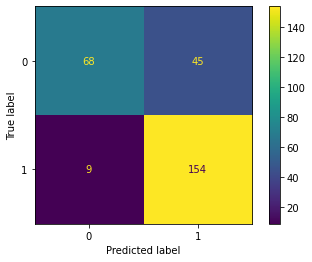

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
gnb.score(X_test,y_test)
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

In [ ]:
print("The accuracy for Naive Bytes= "+str(accuracy_score(y_test,y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

The accuracy for Naive Bytes= 0.8043478260869565
Recall: 0.9447852760736196


### The Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


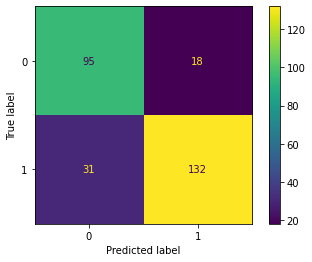

In [ ]:
logisticRegressionmodel=LogisticRegression()
logisticRegressionmodel.fit(X_train,y_train)
y_pred=logisticRegressionmodel.predict(X_test)
plot_confusion_matrix(logisticRegressionmodel, X_test, y_test)
plt.show()

In [ ]:
print("The accuracy for Logsitic Regresion= "+str(accuracy_score(y_test,y_pred)*100))
print("Recall: "+str(recall_score(y_test, y_pred)*100))

The accuracy for Logsitic Regresion= 82.2463768115942
Recall: 80.98159509202453


### KNN algorithm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


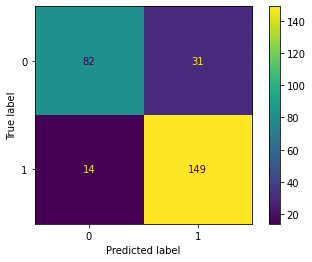

In [ ]:
score=[]
for i in range(1,50):
    knnalgo=KNeighborsClassifier(n_neighbors=i)
    knnalgo.fit(X_train,y_train)
    y_pred=knnalgo.predict(X_test)
    temp=mean_squared_error(y_test,y_pred)
    score.append(temp)
    
knnalgo=KNeighborsClassifier(n_neighbors=26)
knnalgo.fit(X_train, y_train)
y_pred = knnalgo.predict(X_test)
temp=mean_squared_error(y_test, y_pred)
plot_confusion_matrix(knnalgo, X_test, y_test)
plt.show()

In [ ]:
print("The accuracy for Naive Bytes= "+str(accuracy_score(y_test,y_pred)*100))
print("Recall: "+str(recall_score(y_test, y_pred)*100))

The accuracy for Naive Bytes= 83.69565217391305
Recall: 91.41104294478528


### RandomForestRegressor

In [ ]:
regressor = RandomForestRegressor(n_estimators = 500,max_depth=3,random_state =1000)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
y_test=list(y_test)
for i in range(len(y_pred)):
    y_pred[i]=round(y_pred[i])
y_pred=list(y_pred)
print("The accuracy for Random Forest Regressor= "+str(accuracy_score(y_test,y_pred)*100))
print("Recall: "+str(recall_score(y_test, y_pred)*100))

The accuracy for Random Forest Regressor= 84.05797101449275
Recall: 88.34355828220859


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(X_train,y_train)
y_pred=linear_regression.predict(X_test)
for i in range(len(y_pred)):
    y_pred[i]=round(y_pred[i])
y_pred=list(y_pred)

print("Accuracy: "+str(accuracy_score(y_test,y_pred)*100))
print("Recall: "+str(recall_score(y_test, y_pred)*100))

Accuracy: 79.34782608695652
Recall: 74.84662576687117


### RNN

In [ ]:
time_step=11
model = Sequential(name="RNN-Model") 
model.add(Input(shape=(time_step,1), name='Input-Layer')) 
model.add(SimpleRNN(units=6, activation='tanh', name='Hidden-Recurrent-Layer')) 
model.add(Dense(units=1, activation='tanh', name='Hidden-Layer')) 
model.add(Dense(units=1, activation='tanh',name='Hidden-Layer-2'))
model.add(Dense(units=1, activation='tanh',name='Hidden-Layer-3'))
model.add(Dense(units=1, activation='tanh',name='Hidden-Layer-4'))
model.add(Dense(units=1, activation='tanh',name='Hidden-Layer-5'))
model.add(Dense(units=1, activation='tanh',name='Hidden-Layer-6'))
model.add(Dense(units=1, activation='sigmoid', name='Output-Layer')) 


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
y_train=np.array(y_train).reshape(-1)

In [ ]:
model.fit(X_train, y_train, 
          batch_size=1, 
          epochs=30, 
          verbose='auto',
          callbacks=None)

Epoch 1/30
642/642 [==============================] - 6s 5ms/step - loss: 0.6360 - accuracy: 0.7305
Epoch 2/30
642/642 [==============================] - 3s 5ms/step - loss: 0.4711 - accuracy: 0.8520
Epoch 3/30
642/642 [==============================] - 4s 6ms/step - loss: 0.4248 - accuracy: 0.8442
Epoch 4/30
642/642 [==============================] - 2s 3ms/step - loss: 0.4093 - accuracy: 0.8458
Epoch 5/30
642/642 [==============================] - 2s 3ms/step - loss: 0.3984 - accuracy: 0.8567
Epoch 6/30
642/642 [==============================] - 2s 3ms/step - loss: 0.3979 - accuracy: 0.8505
Epoch 7/30
642/642 [==============================] - 2s 3ms/step - loss: 0.3838 - accuracy: 0.8598
Epoch 8/30
642/642 [==============================] - 2s 3ms/step - loss: 0.3824 - accuracy: 0.8536
Epoch 9/30
642/642 [==============================] - 2s 3ms/step - loss: 0.3711 - accuracy: 0.8692
Epoch 10/30
642/642 [==============================] - 3s 4ms/step - loss: 0.3707 - accuracy: 0.8614

In [ ]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train = (pred_train > 0.5)
pred_test = (pred_test > 0.5)

print("")
print('-------------------- Model Summary --------------------')
model.summary()
print("")
print('---------- Evaluation on Training Data ----------')
print("Recall: ", recall_score(y_train, pred_train))
print("")

print('---------- Evaluation on Test Data ----------')
print("Recall: ", recall_score(y_test, pred_test))
print("")


-------------------- Model Summary --------------------
Model: "RNN-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Recurrent-Layer (Sim  (None, 6)                48        
 pleRNN)                                                         
                                                                 
 Hidden-Layer (Dense)        (None, 1)                 7         
                                                                 
 Hidden-Layer-2 (Dense)      (None, 1)                 2         
                                                                 
 Hidden-Layer-3 (Dense)      (None, 1)                 2         
                                                                 
 Hidden-Layer-4 (Dense)      (None, 1)                 2         
                                                                 
 Hidden-Layer-5 (Dense)      (None, 1)                 2         


Accuracy: 86.6043613707165
Recall: 87.53623188405797


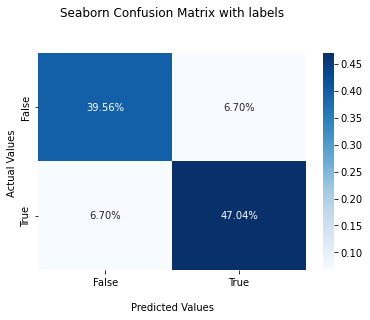

In [ ]:
conf_train=confusion_matrix(y_train,pred_train)
print("Accuracy: "+str(accuracy_score(y_train,pred_train)*100))
print("Recall: "+str(recall_score(y_train, pred_train)*100))
ax = sns.heatmap(conf_train/np.sum(conf_train), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

Accuracy: 84.05797101449275
Recall: 85.88957055214725


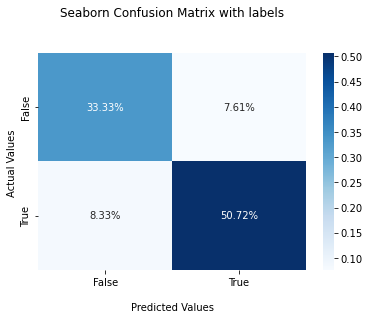

In [ ]:
conf_test=confusion_matrix(y_test,pred_test)
print("Accuracy: "+str(accuracy_score(y_test,pred_test)*100))
print("Recall: "+str(recall_score(y_test, pred_test)*100))
ax = sns.heatmap(conf_test/np.sum(conf_test), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

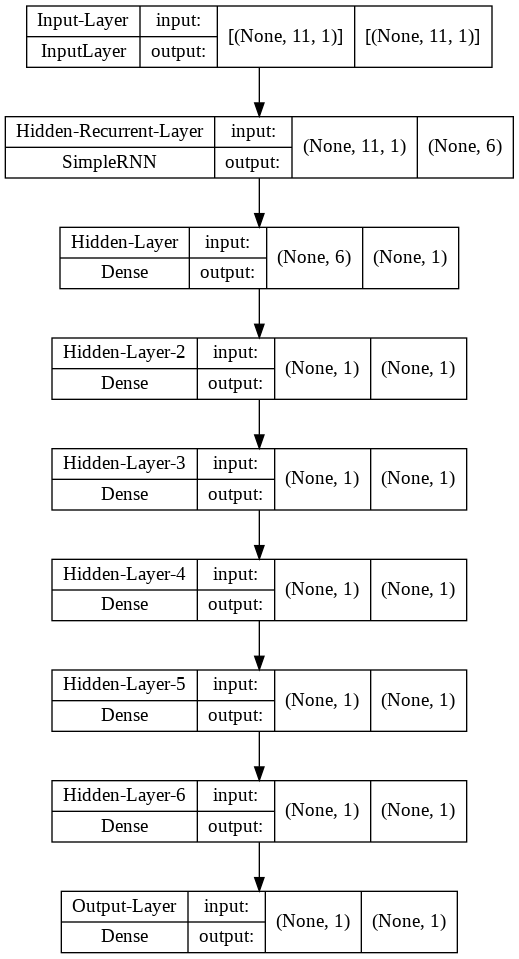

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)